In [1]:
from os import listdir
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [10]:
path = r"Emotion/Train/Anger/"
namelist = listdir(path)
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.7) as holistic:
    for images in namelist:
        image = cv2.imread(path + "image0009264.jpg", 0)

        # Recolor Feed
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  

        # Make Detections
        results = holistic.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                    mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                    mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                    )

        cv2.imshow('image', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
cv2.destroyAllWindows()

In [15]:
results.face_landmarks.landmark[0].visibility

0.0

In [56]:
import csv
import os
import numpy as np

In [57]:
num_coords = len(results.face_landmarks.landmark)
num_coords

468

In [58]:
landmarks = ['name','class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val), ]

In [59]:
landmarks

['name',
 'class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 

In [60]:
classlist = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

In [61]:
with open('coords_500_Resize.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [64]:
# train
for classname in classlist:
    class_name = classname
    path = f"ResizeEmotion/Train/{class_name}/"
    namelist = listdir(path)
    with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.7) as holistic:
        for images in namelist:
            image = cv2.imread(path + images, 0)

            # Recolor Feed
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False  

            # Make Detections
            results = holistic.process(image)

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                        )

            # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_hqolistic.FACEMESH_CONTOURS, 
            #                              mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=1, circle_radius=1),
            #                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
            #                              )

             # Export coordinates
            try:    
                # Extract Face landmarks
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
                # face_row = list(np.array([[landmark.x, landmark.y] for landmark in face]).flatten())

                # Append class name 
                face_row.insert(0, images)
                face_row.insert(1, class_name)

                # Export to CSV
                with open('coords_500_Resize.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(face_row) 

            except:
                pass

            cv2.imshow('image', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()

In [65]:
with open('coords_500_test_Resize.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

# train
for classname in classlist:
    class_name = classname
    path = f"ResizeEmotion/Test/{class_name}/"
    namelist = listdir(path)
    with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.7) as holistic:
        for images in namelist:
            image = cv2.imread(path + images, 0)

            # Recolor Feed
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False  

            # Make Detections
            results = holistic.process(image)

            # Recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                        )

            # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_hqolistic.FACEMESH_CONTOURS, 
            #                              mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=1, circle_radius=1),
            #                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
            #                              )

             # Export coordinates
            try:    
                # Extract Face landmarks
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
                # face_row = list(np.array([[landmark.x, landmark.y] for landmark in face]).flatten())

                # Append class name 
                face_row.insert(0, images)
                face_row.insert(1, class_name)

                # Export to CSV
                with open('coords_500_test_Resize.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(face_row) 

            except:
                pass

            cv2.imshow('image', image)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cv2.destroyAllWindows()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold

dftrain = pd.read_csv('coords_500.csv')
dftest = pd.read_csv('coords_500_test.csv')

In [48]:
dftrain_s = dftrain.sample(frac=1, random_state=1234)
dftest_s = dftest.sample(frac=1, random_state=1234)

In [49]:
# normal
X_train = dftrain_s.drop(['name','class'], axis=1) # features
y_train = dftrain_s['class'] # target value
X_test = dftest_s.drop(['name','class'], axis=1) # features
y_test = dftest_s['class']

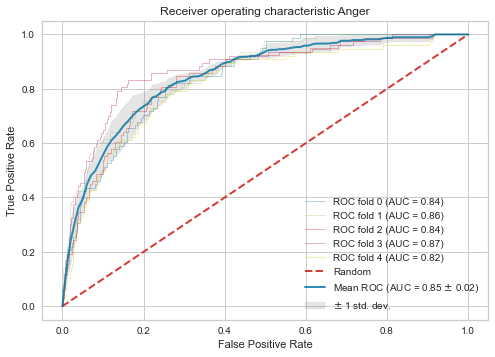

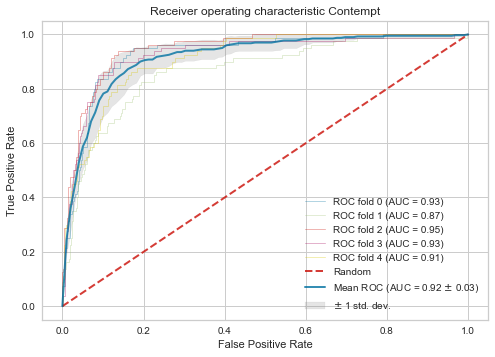

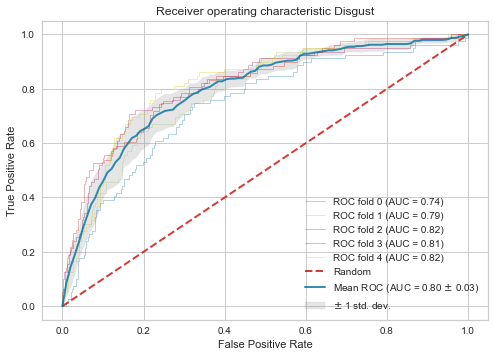

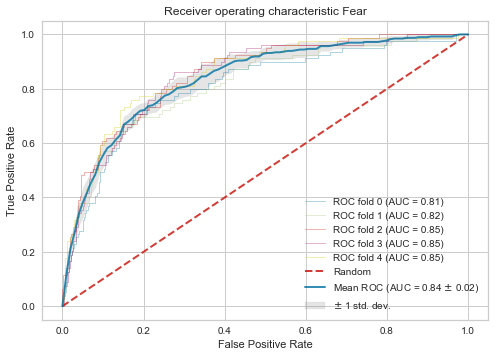

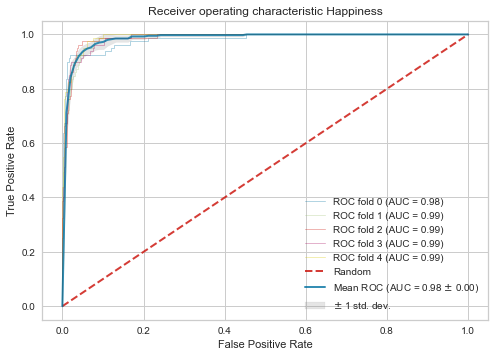

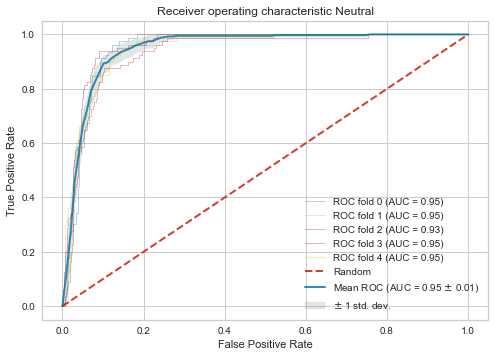

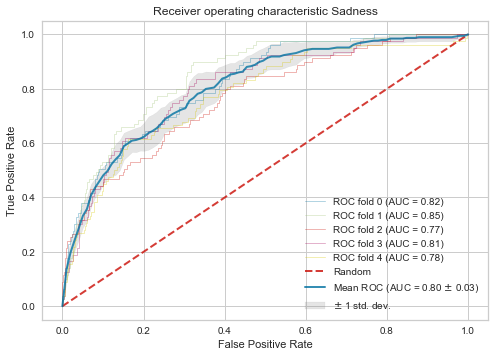

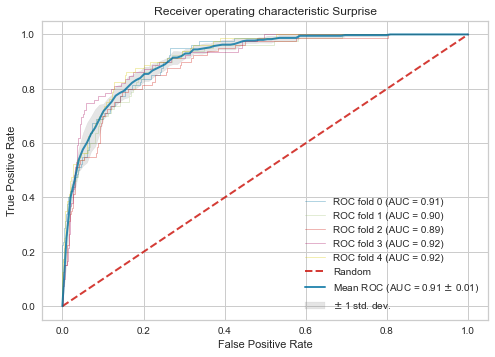

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import interp
from sklearn import svm, datasets
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Instantiate the classification model and visualizer

model = LogisticRegression(max_iter=10000)

class_list = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']

j = 0
for name in class_list:
    i = 0
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X_train, y_train):
        probas_ = model.fit(X_train.iloc[train], y_train.iloc[train]).predict_proba(X_train.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_train.iloc[test], probas_[:, j], pos_label=name)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Random', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic {name.capitalize()}')
    plt.legend(loc="lower right")
    plt.show()
    j += 1

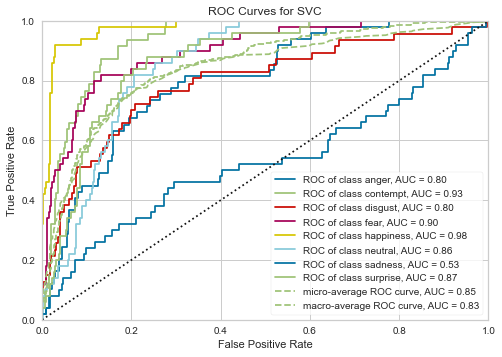

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
from sklearn import svm, datasets
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.datasets import load_game

model = svm.SVC(kernel="linear", probability=True, random_state=12) #LogisticRegression(max_iter=10000)
visualizer = ROCAUC(model, classes=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

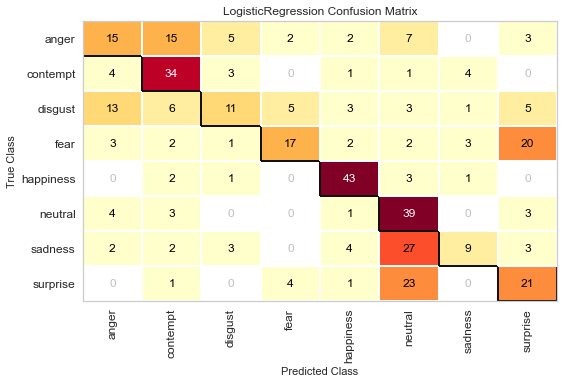

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
from sklearn import svm, datasets
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from yellowbrick.datasets import load_game

model = LogisticRegression(max_iter=10000) #svm.SVC(kernel="linear", probability=True, random_state=12)
#LogisticRegression(max_iter=10000)
#svm.SVC(kernel="linear", probability=True, random_state=12)
cm = ConfusionMatrix(model, classes=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

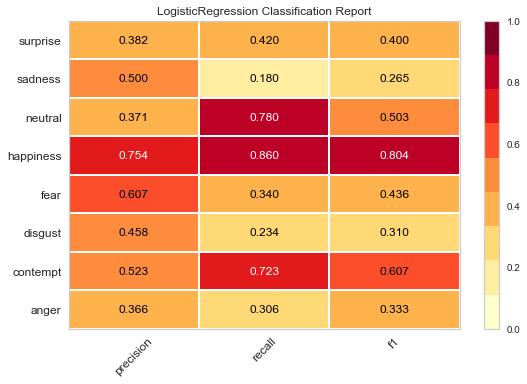

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [55]:
from sklearn import svm, datasets
from sklearn.linear_model import RidgeClassifier, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC, ClassificationReport
from yellowbrick.datasets import load_game

model = LogisticRegression(max_iter=10000) #svm.SVC(kernel="linear", probability=True, random_state=12) #RidgeClassifier()
visualizer = ClassificationReport(model, classes=['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   